# Setting up

In [1]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/2cwl1l9v370wkep/cv_dataset.zip

--2023-06-27 06:14:16--  https://www.dropbox.com/s/2cwl1l9v370wkep/cv_dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2cwl1l9v370wkep/cv_dataset.zip [following]
--2023-06-27 06:14:17--  https://www.dropbox.com/s/raw/2cwl1l9v370wkep/cv_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb05e1f7000ee678c307eb5f179.dl.dropboxusercontent.com/cd/0/inline/B-wpr8lqsxSooFRIGaR42A9kqlt-IzdU3QTGjaJ42cqslZT89WKmKyWok2J5OqM8t1yy3Fl-YblOXWDbYRgk6qSCk2FanMljpO74ACXHONXYHe_1oAELcHqOXGDy0zF4pqe-C0bc96eCRcj4IA5UpINnr6m4ziAIFN-Xsi095jACOA/file# [following]
--2023-06-27 06:14:18--  https://ucb05e1f7000ee678c307eb5f179.dl.dropboxusercontent.com/cd/0/inline/B-wpr8lqsxSooFRIGaR42A9kqlt-IzdU3QTGjaJ42cqslZT89WKmKyWok2J5OqM8t1yy3Fl-Y

In [2]:
!unzip cv_dataset.zip

Archive:  cv_dataset.zip
   creating: cv_dataset/
   creating: cv_dataset/sugarcane/
  inflating: cv_dataset/.DS_Store    
  inflating: __MACOSX/cv_dataset/._.DS_Store  
   creating: cv_dataset/grass/
   creating: cv_dataset/cassava/
   creating: cv_dataset/maize/
  inflating: cv_dataset/sugarcane/image_s_40.jpg  
  inflating: cv_dataset/sugarcane/image_s_54.jpg  
  inflating: cv_dataset/sugarcane/image_s_68.jpg  
  inflating: cv_dataset/sugarcane/image_s_83.jpg  
  inflating: cv_dataset/sugarcane/image_s_97.jpg  
  inflating: cv_dataset/sugarcane/image_s_96.jpg  
  inflating: cv_dataset/sugarcane/image_s_82.jpg  
  inflating: cv_dataset/sugarcane/image_s_69.jpg  
  inflating: cv_dataset/sugarcane/image_s_55.jpg  
  inflating: cv_dataset/sugarcane/image_s_41.jpg  
  inflating: cv_dataset/sugarcane/image_s_57.jpg  
  inflating: cv_dataset/sugarcane/image_s_43.jpg  
  inflating: cv_dataset/sugarcane/image_s_94.jpg  
  inflating: cv_dataset/sugarcane/image_s_80.jpg  
  inflating: cv_datas

## process dataset

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [4]:
os.makedirs("./data/train/cassava")
os.makedirs("./data/train/grass")
os.makedirs("./data/train/maize")
os.makedirs("./data/train/sugarcane")

os.makedirs("./data/val/cassava")
os.makedirs("./data/val/grass")
os.makedirs("./data/val/maize")
os.makedirs("./data/val/sugarcane")

os.makedirs("./data/test/cassava")
os.makedirs("./data/test/grass")
os.makedirs("./data/test/maize")
os.makedirs("./data/test/sugarcane")

cassava = len(os.listdir('./cv_dataset/cassava'))
maize = len(os.listdir('./cv_dataset/maize'))
sugarcane = len(os.listdir('./cv_dataset/sugarcane'))
grass = len(os.listdir('./cv_dataset/grass'))

print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} Sugar Cane Images")
print(f"{grass} Grass Images")

298 Cassava Images
280 Maize Images
102 Sugar Cane Images
287 Grass Images


In [54]:
def populate_for_class(root_dir = 'data', training_ratio = 0.9, validation_ratio = 0.22):
  data_test = []
  data_train = []
  classes = [
      {
          "dir": 'cv_dataset/cassava',
          'text_label': 'cassava',
          "label": 0
      },
      {
          "dir": 'cv_dataset/grass',
          'text_label': 'grass',
          "label": 1
      },
      {
          "dir": 'cv_dataset/maize',
          'text_label': 'maize',
          "label": 2
      },
      {
          "dir": 'cv_dataset/sugarcane',
          'text_label': 'sugarcane',
          "label": 3
      }
  ]
  for dataset_class in classes:
    label = dataset_class['label']
    folder = dataset_class['text_label']
    src = dataset_class['dir']
    images = os.listdir(src)
    split = int(len(images) * training_ratio)
    for i, img in enumerate(images):
      train_limit = int(split * (1 - validation_ratio))
      if i < split:
        if i < train_limit:
          shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/train/{folder}", img))
        else:
          shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/val/{folder}", img))
      else:
        shutil.copy(os.path.join(src, img), os.path.join(f"{root_dir}/test/{folder}", img))

In [55]:
populate_for_class()

# Data Loading

In [78]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dropout,  MaxPooling2D, Flatten, Dense, Input, Activation, BatchNormalization

In [40]:
# Constants
BATCH_SIZE = 8
EPOCHS=7

In [68]:
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_itr = data_gen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

val_itr = data_gen.flow_from_directory(
    'data/val',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_itr = data_gen.flow_from_directory(
    'data/test',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 676 images belonging to 4 classes.
Found 193 images belonging to 4 classes.
Found 98 images belonging to 4 classes.


# Model training[Original Extracted Dataset]

In [41]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(4, activation='softmax'))

In [42]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

In [43]:
history = model.fit(train_itr, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=val_itr)

Epoch 1/7
85/85 [==============================] - 57s 658ms/step - loss: 1.3721 - accuracy: 0.7737 - val_loss: 0.7709 - val_accuracy: 0.8653
Epoch 2/7
85/85 [==============================] - 56s 657ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.5875 - val_accuracy: 0.8756
Epoch 3/7
85/85 [==============================] - 58s 688ms/step - loss: 0.0424 - accuracy: 0.9882 - val_loss: 0.3688 - val_accuracy: 0.9326
Epoch 4/7
85/85 [==============================] - 57s 671ms/step - loss: 0.0032 - accuracy: 0.9985 - val_loss: 0.2466 - val_accuracy: 0.9171
Epoch 5/7
85/85 [==============================] - 65s 762ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2221 - val_accuracy: 0.9223
Epoch 6/7
85/85 [==============================] - 62s 734ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2108 - val_accuracy: 0.9171
Epoch 7/7
85/85 [==============================] - 62s 730ms/step - loss: 3.4330e-04 - accuracy: 1.0000 - val_loss: 0.2041 - val_accuracy: 0.9326


<Axes: >

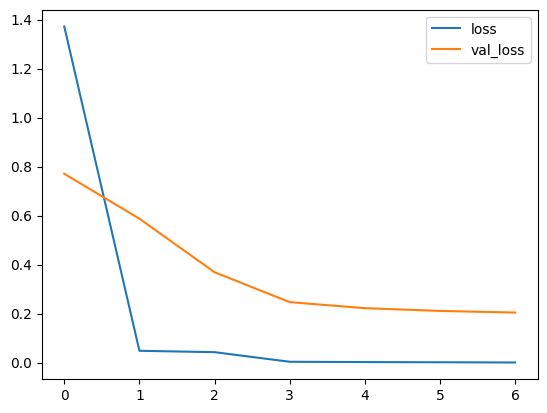

In [44]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

<Axes: >

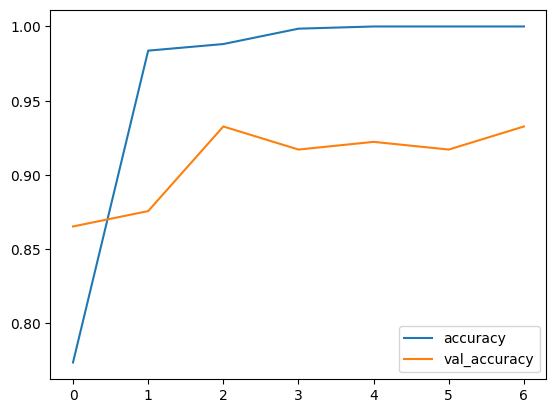

In [45]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [46]:
prediction = model.predict(test_itr)

13/13 [==============================] - 8s 611ms/step


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [48]:
pred_labels = np.argmax(prediction, axis=1)
print(classification_report(test_itr.classes, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.90      0.97      0.93        29
           2       0.96      0.89      0.93        28
           3       0.92      1.00      0.96        11

    accuracy                           0.95        98
   macro avg       0.95      0.96      0.95        98
weighted avg       0.95      0.95      0.95        98



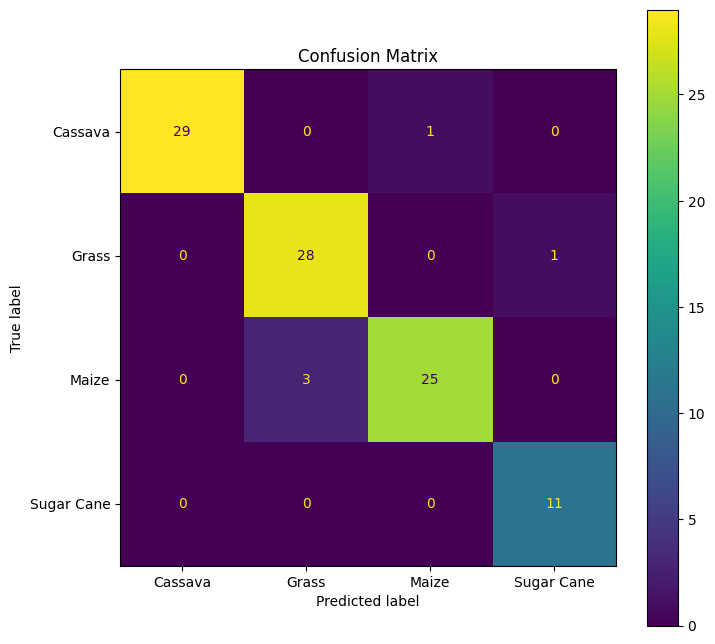

In [49]:
matrix = confusion_matrix(test_itr.classes, pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()